# Digitall Image Processing HomeWord 4
## Question 1
### Part a
Using Weiner filter, try to recustruct the blurred `Khayyam.jpg` image. Assume that the cameras motion-sensor returned the `psf_1.bmp` as impulse respunse of destruction function.

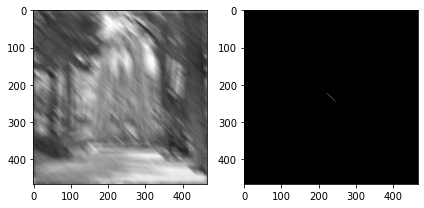

In [39]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, ifftshift
%matplotlib inline

### 
# Hint: Dont forget to scale [0-1] and normalize psf
#       PSF image should be shifted before taking dft (H = fft2( ifftshif(psf) )
#       > Regards
###

def showImages(img):
    for i in range(len(img)):
        plt.subplot(1,len(img),i+1)
        plt.imshow(img[i], cmap='gray', vmin=0, vmax=255)
    plt.tight_layout()
    plt.show()

khayyam = cv.imread('./Khayyam.jpg', cv.IMREAD_GRAYSCALE)
psf1 = cv.imread('./psf1.bmp', cv.IMREAD_GRAYSCALE)
showImages([khayyam, psf1])

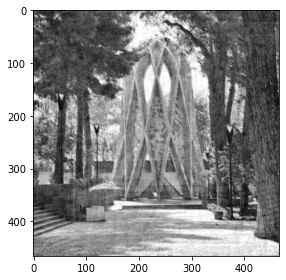

In [94]:
def normalize(mat):
    mat.astype(np.float32)
    return mat/mat.sum()

def weiner(img, psf, k=0):
    psf = normalize(psf)
    psf = ifftshift(psf)
    H = fft2(psf)
    H_2 = (np.abs(H) * np.abs(H))
    F = fft2(img)
    F = np.divide(H_2,(H_2 + k))*F
    F = np.divide(F,H)
    f = ifft2(F)
    f = np.abs(f)
    return f

showImages([weiner(khayyam, psf1, 10e-4)])

### Part b
The picture `car.jpg` is taken from a moving car on the street and, we want to read its plate. using previously defined function in part 1, find the propper parameters for weiner filter to clearify the plate, you can use `cv.line()` function to draw you desired `PSF` file.

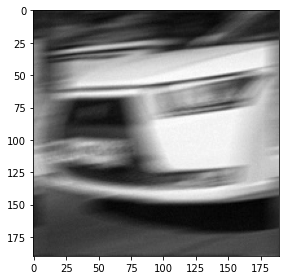

In [84]:
car = cv.imread("car.jpg", cv.IMREAD_GRAYSCALE)
showImages([car])

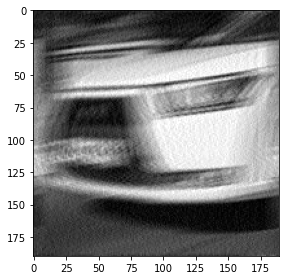

In [379]:
from math import cos, sin, pi, degrees
def line(r, teta):
    x = r*cos(teta)
    y = r*sin(teta)
    return (int(x),int(y))

h, w = car.shape
psf = np.zeros(car.shape)
x, y = line(4, (20*pi)/360)
cv.line(psf, (h//2-x, w//2+y), (h//2+x, w//2-y), 255, 1)
plate = weiner(car, psf, 8*10e-4)
showImages([plate])

## Question 2
Using the code bellow, calculate sobol and canny filter of the image.

In [4]:
import cv2 as cv
import numpy as np

def sobol(img):
    sobol = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    img = cv.filter2D(img, -1, sobol)
    return img

def canny(img):
    img = cv.GaussianBlur(img,(5,5),3)
    img = sobol(img)
    
    return img

cam_id = 0

cap = cv.VideoCapture(cam_id)

while True:
    ret, I = cap.read()
    cv.imshow("My Camera", I)
    canny_I = canny(I)
    sobol_I = sobol(I)
    cv.imshow("Canny", canny_I)
    cv.imshow("Sobol", sobol_I)

    # Press 'e' to exit
    if cv.waitKey(1) & 0xFF == ord('e'):
        break 

cap.release()
cv.destroyAllWindows()